<a href="https://colab.research.google.com/github/Hemanth160425/makemore2.0/blob/main/makemore2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [ ]:
words=open('names.txt','r').read().splitlines()
words[:10]


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [49]:
len(words)

32033

In [ ]:
k=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(k)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [ ]:
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [42]:
bloks=3
x=[]
y=[]
for w in words:
  context=[0]*bloks
  for ch in w+'.':
    ix=stoi[ch]
    x.append(context)
    y.append(ix)
    # print(''.join(itos[i] for i in context) ,"--->" ,itos[ix])
    context=context[1:]+[ix]
X=torch.tensor(x)
Y=torch.tensor(y)

In [43]:
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
torch.cat([enc[:,0,:],enc[:,1,:],enc[:,2,:]],1).shape

torch.Size([32, 6])

In [ ]:
# also to remove a tensor dimention use unbind
torch.cat(torch.unbind(enc,1),1).shape
# unbind just take next each element of the list  dont use above or this create a new copy


torch.Size([32, 6])

In [127]:
g=torch.Generator().manual_seed(2147483647)
c=torch.randn((27,2),generator=g)
enc=c[x]
W1=torch.randn((6,100),generator=g)
b1=torch.randn((100),generator=g)
w2=torch.rand((100,27),generator=g)
b2=torch.rand((27),generator=g)
parameters=[c,W1,b1,w2,b2]

In [128]:
for p in parameters:
  p.requires_grad=True

In [94]:
for  p in parameters:
  p.grad=None

In [98]:
# how should we choose learning rate
lr=torch.linspace(-3,0,1000)
ls=10**(lr)


In [122]:
# or use view it use storage to store raw numbers
# lrl=[]
# lossl=[]
for  i in range(1000):
  ix=torch.randint(0,X.shape[0],(32,))
  enc=c[X[ix]]
  h=torch.tanh(enc.view(-1,6)@W1+b1)
  logits=h@w2+b2
  # logits.shape
  loss=F.cross_entropy(logits,Y[ix])
  # print(loss.item())
  for p in parameters:
    p.grad=None
  loss.backward()
  for p in parameters:
    p.data+=-0.1*p.grad
  # lrl.append(ls[i])
  # lossl.append(loss.item())


In [124]:
enc=c[X]
h=torch.tanh(enc.view(-1,6)@W1+b1)
logits=h@w2+b2
# logits.shape
loss=F.cross_entropy(logits,Y)
loss.item()

2.3748536109924316

In [137]:
# @title in this we need to scale up so that we  can avoid underfit
# just increse the size of the hidden layer
# first we tried with different learning rates
# next we tried with different size of the hidden layer
# then we triign with different size of the embedding


In [169]:
# increase the embiding sizze
g=torch.Generator().manual_seed(2147483647)
c=torch.randn((27,10),generator=g)
enc=c[x]
W1=torch.randn((30,300),generator=g)
b1=torch.randn((300),generator=g)
w2=torch.rand((300,27),generator=g)
b2=torch.rand((27),generator=g)
parameters=[c,W1,b1,w2,b2]

In [172]:
# @title change into funtion
def train(words):
  bloks=3
  x=[]
  y=[]
  for w in words:
    context=[0]*bloks
    for ch in w+'.':
      ix=stoi[ch]
      x.append(context)
      y.append(ix)
      # print(''.join(itos[i] for i in context) ,"--->" ,itos[ix])
      context=context[1:]+[ix]
  X=torch.tensor(x)
  Y=torch.tensor(y)
  return X,Y
import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

xtrain,ytrain=train(words[:n1])
xdev,ydev=train(words[n1:n2])
xtest,ytest=train(words[n2:])


In [176]:
# or use view it use storage to store raw numbers
# lrl=[]
lossl=[]
steps=[]
for  i in range(3000):
  ix=torch.randint(0,xtrain.shape[0],(32,))
  enc=c[xtrain[ix]]
  h=torch.tanh(enc.view(-1,30)@W1+b1)
  logits=h@w2+b2
  # logits.shape
  loss=F.cross_entropy(logits,ytrain[ix])
  # print(loss.item())
  for p in parameters:
    p.grad=None
  loss.backward()
  for p in parameters:
    p.data+=-0.1*p.grad
  # lrl.append(ls[i])
  lossl.append(loss.item())
  steps.append(i)



In [180]:
# for training loss
# change the dimentions
enc=c[xtrain]
h=torch.tanh(enc.view(-1,30)@W1+b1)
logits=h@w2+b2
# logits.shape
loss=F.cross_entropy(logits,ytrain)
loss.item()

2.381192922592163

In [181]:
# for evaluation loss
# change the dimentions
enc=c[xdev]
h=torch.tanh(enc.view(-1,30)@W1+b1)
logits=h@w2+b2
# logits.shape
loss=F.cross_entropy(logits,ydev)
loss.item()

2.414196729660034

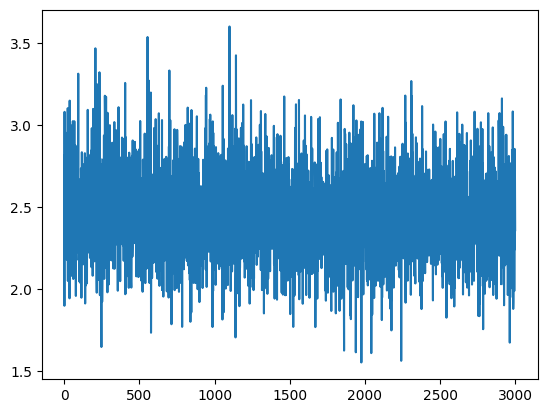

In [179]:
plt.plot(steps,lossl)

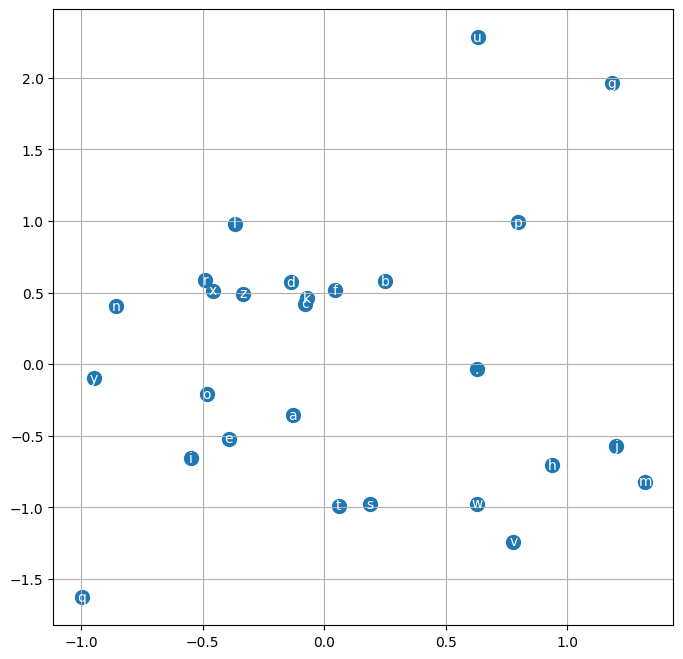

In [168]:
# ploting of the embidings of the alphabets
plt.figure(figsize=(8,8))
plt.scatter(c[:,0].data,c[:,1].data,s=100)
for i in range(c.shape[0]):
  plt.text(c[i,0].item(),c[i,1].item(),itos[i],ha='center',va='center',color='white')
plt.grid('minor')

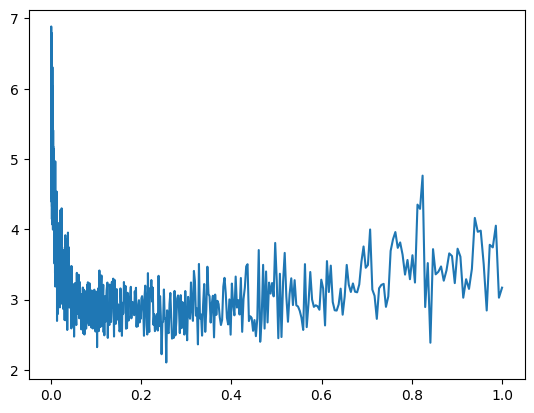

In [100]:
plt.plot(lrl,lossl)
# to choose the learingin rate it should not tougle nor it take too long

In [102]:
# from the above graph we observed the loass is mininmum at 0.1 learing rate

In [ ]:
# using batch of 32 train olny for 32 and update for remaining /
torch.randint(0,X.shape[0],(32,))

In [24]:
# out=logits.exp()
# prob=out/out.sum(1,keepdims=True)
# prob.shape
# loss=-prob[torch.arange(32),y].log().mean()
# loss

tensor(6.1158)

In [ ]:
# @title CONCLUTION

# change iteration
# change  learingin rate
# change hidden layer size
# chane embiding size
# change batch size




In [ ]:
# @title suggetion

#  use log for loss to get smooth graph

